In [1]:
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
import os
import h5py
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

import pandas as pd

 
tic = time.perf_counter()
plt.close("all")

In [2]:
section_height = 0.0667
section_width = 0.365
section_length_1 = 2.68
section_length_2 = 2.66

In [3]:
#2D
section_name_US = "MDS_2D_Harmonic"
section_name_DS = "MUS_2D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_213D_03_01_01_000', 'HAR_INT_MDS_GAP_213D_03_01_01_001', 'HAR_INT_MDS_GAP_213D_03_01_01_002', 'HAR_INT_MDS_GAP_213D_03_01_02_000', 'HAR_INT_MDS_GAP_213D_03_01_02_001', 'HAR_INT_MDS_GAP_213D_03_01_02_003', 'HAR_INT_MDS_GAP_213D_03_01_03_000', 'HAR_INT_MDS_GAP_213D_03_01_03_001', 'HAR_INT_MDS_GAP_213D_03_01_03_002', 'HAR_INT_MDS_GAP_213D_03_01_04_000', 'HAR_INT_MDS_GAP_213D_03_01_04_001', 'HAR_INT_MDS_GAP_213D_03_01_04_002']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_01_01_000', 'HAR_INT_MUS_GAP_213D_03_01_01_001', 'HAR_INT_MUS_GAP_213D_03_01_01_004', 'HAR_INT_MUS_GAP_213D_03_01_02_000', 'HAR_INT_MUS_GAP_213D_03_01_02_001', 'HAR_INT_MUS_GAP_213D_03_01_02_003', 'HAR_INT_MUS_GAP_213D_03_01_03_001', 'HAR_INT_MUS_GAP_213D_03_01_03_002', 'HAR_INT_MUS_GAP_213D_03_01_03_003', 'HAR_INT_MUS_GAP_213D_03_01_04_000', 'HAR_INT_MUS_GAP_213D_03_01_04_001', 'HAR_INT_MUS_GAP_21

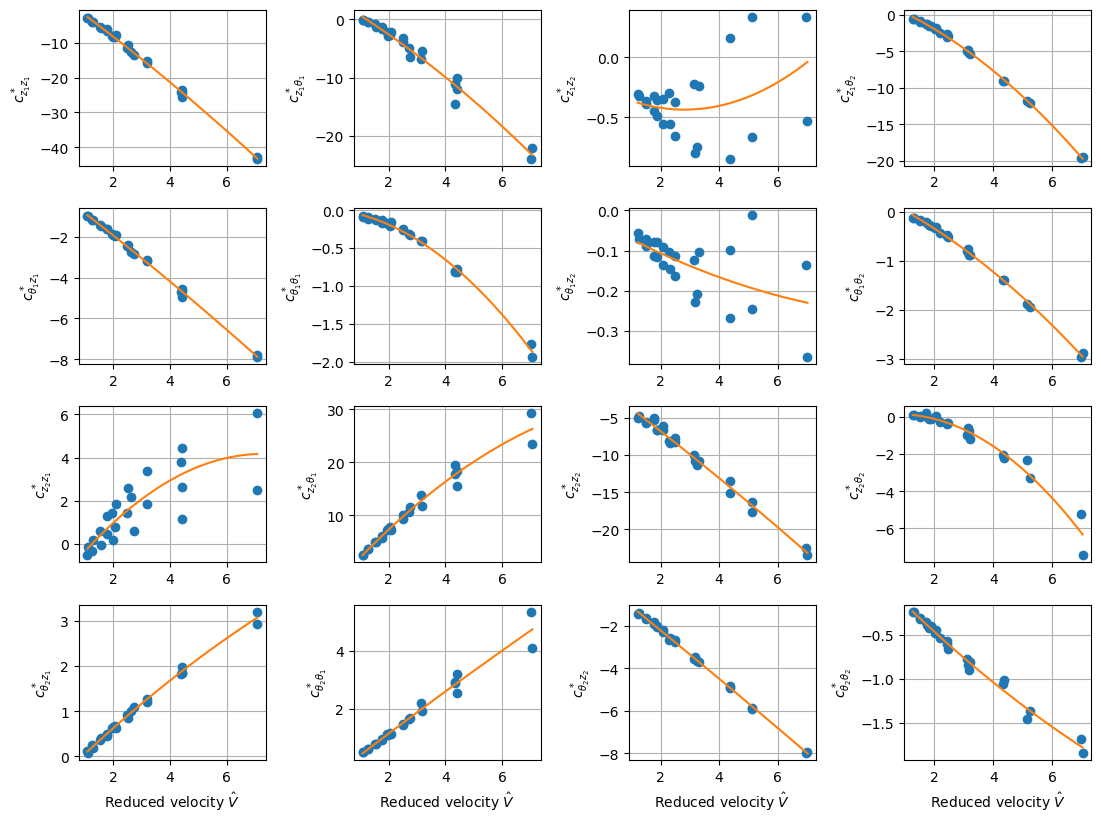

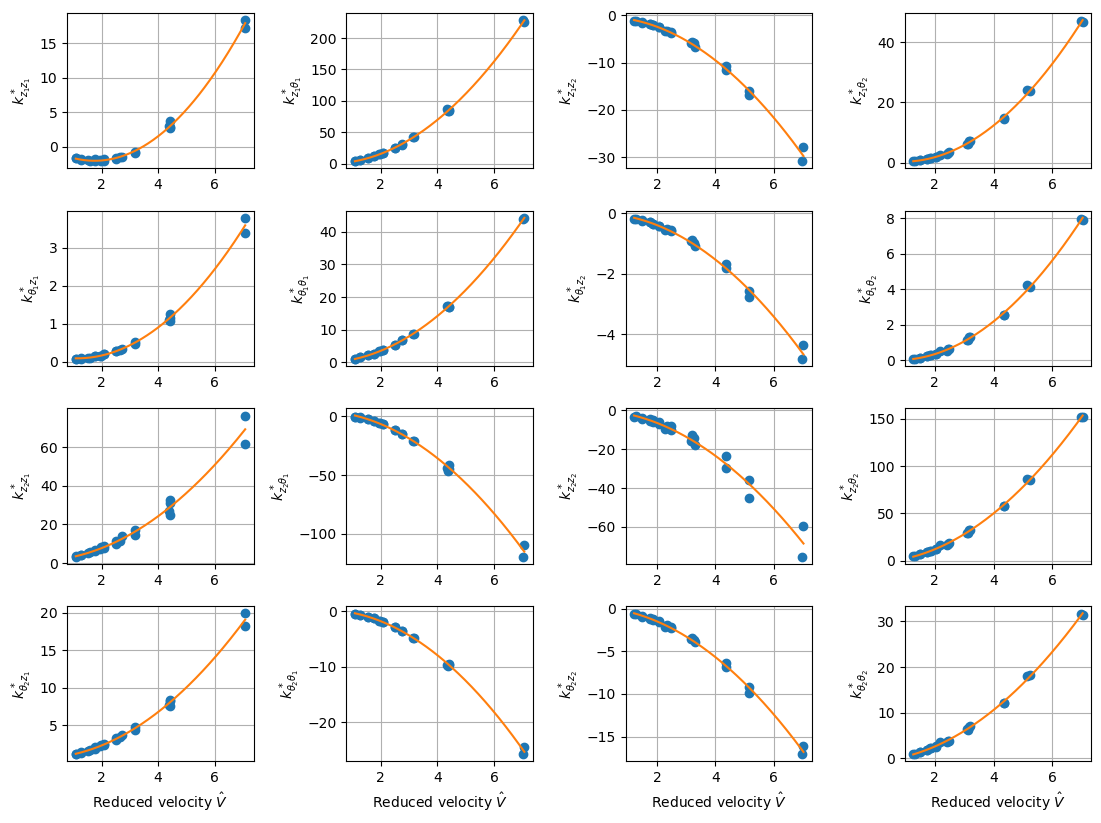

In [4]:
ads_list = []
val_list = []
expf_list = []

fig_damping_2D, _ = plt.subplots(4,4)
fig_stiffness_2D, _ = plt.subplots(4,4)

all_ads_gap2D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap2D.append(ads_US)

    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap2D.append(ads_DS) 

all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D, mode='total+poly', orders = np.ones(32,dtype=int)*2)


# file_path = ".\\Plots_AD\\"
# damping_path = os.path.join(file_path, 'AD_2D_damping_poly4.png')
# fig_damping_2D.savefig(damping_path, bbox_inches="tight")
# stiffness_path = os.path.join(file_path, 'AD_2D_stiffness_poly4.png')
# fig_stiffness_2D.savefig(stiffness_path, bbox_inches="tight")

plt.show()

In [6]:
poly_coeff, v_range = all_ads_gap2D.fit_poly(orders = np.ones(32,dtype=int)*2)
print(poly_coeff, v_range)


[[-1.13506323e-01 -5.85992026e+00  3.93854247e+00]
 [-1.38353000e-01 -2.83249110e+00  3.67164551e+00]
 [ 2.24232568e-02 -1.26232236e-01 -2.58653044e-01]
 [-2.20572615e-01 -1.53749026e+00  1.99810396e+00]
 [-1.39029039e-02 -1.04182039e+00  1.96666613e-01]
 [-3.29001348e-02 -3.41845703e-02  1.21409759e-02]
 [ 1.70411676e-03 -3.98159592e-02 -3.41373744e-02]
 [-2.55335810e-02 -2.89026900e-01  3.34012699e-01]
 [-1.14462798e-01  1.66479195e+00 -1.88664991e+00]
 [-2.50236007e-01  6.02411678e+00 -3.78068419e+00]
 [-3.60719710e-02 -2.94304899e+00 -7.50122009e-01]
 [-1.65223421e-01  2.52801444e-01  5.26149430e-02]
 [-1.45987099e-02  6.12739525e-01 -5.39318155e-01]
 [-5.40744716e-03  7.58366193e-01 -3.53236291e-01]
 [-5.06269243e-03 -1.10306237e+00  1.17302614e-03]
 [ 8.73071166e-03 -3.40485069e-01  1.81780106e-01]
 [ 7.01548434e-01 -2.45422095e+00  9.87832795e-02]
 [ 4.85009516e+00 -2.04708793e+00  2.95749572e-01]
 [-6.26735946e-01  2.13248733e-01 -3.29107954e-01]
 [ 1.25718403e+00 -2.26883475e+